In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Reddsa2.csv')

In [4]:
df.head()

,#ServerReceiveDate,msec,HsSendDate,msec.1,ProtorolVer,Sn,Lat,Lon,G_amp,Seq,...,msec.2,Uncertainty,isEq,Bcast,IsEew,Param,MdPort,MdEn,MdAct,Sp
0,9/8/17 4:49,770,4:49:39,736,2,1604062,15.6855,-93.2022,1.22,1,...,446,0,2500,OFF,OFF,NaN,10505,ON,OFF,OFF
1,9/8/17 4:49,147,4:49:40,121,2,1604062,15.6855,-93.2022,1.22,2,...,446,0,2300,OFF,OFF,NaN,10505,ON,OFF,OFF
2,9/8/17 4:49,646,4:49:40,621,2,1604062,15.6855,-93.2022,1.22,3,...,446,0,2500,OFF,OFF,NaN,10505,ON,OFF,OFF
3,9/8/17 4:49,249,4:49:41,223,2,1604062,15.6855,-93.2022,1.22,4,...,446,0,2500,OFF,OFF,NaN,10505,ON,OFF,OFF
4,9/8/17 4:49,949,4:49:41,923,2,1604062,15.6855,-93.2022,1.22,5,...,446,0,2500,OFF,OFF,NaN,10505,ON,OFF,OFF


In [5]:
sensors=pd.DataFrame()
sensors['Sn']=df['Sn'].unique()


In [6]:
lat=df['Lat'].unique()
lon=df['Lon'].unique()

sensors['Lat']=lat
sensors['Lon']=lon

In [7]:
coords=pd.DataFrame({})
coords['Lat']=lat
coords['Lon']=lon

In [8]:
sensors.head()
len(df)
sensors['Sn'][0]

1604062

In [9]:
df['HsSendDate']=pd.to_datetime(df['HsSendDate'])

In [10]:
'''
df['HsSendDate'][0].second
sensors['Sn'][0]==df['Sn'][0]
type(df['HsSendDate'][i].second)
'''

"\ndf['HsSendDate'][0].second\nsensors['Sn'][0]==df['Sn'][0]\ntype(df['HsSendDate'][i].second)\n"

In [11]:

count=0
firstTrigged=[]
for i in range(int(len(df)/2)):
    s=sensors['Sn'][count]
    if df['Sn'][i]==s:
        
        firstTrigged.append(df['HsSendDate'][i].second)
        count+=1
                        
    

In [12]:
from mpl_toolkits.basemap import Basemap

/Users/endrepaulsen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/endrepaulsen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


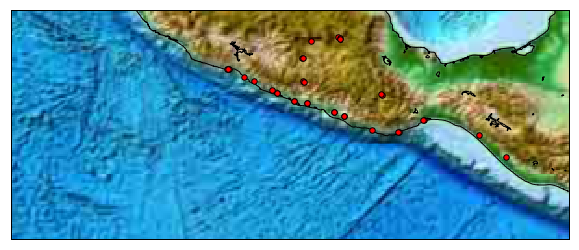

In [15]:
fig=plt.figure(figsize=(10,10))
m = Basemap(projection='mill',llcrnrlon=-110,llcrnrlat=12,urcrnrlat=20,urcrnrlon=-90,resolution='h')#lat_0=45,lon_0=45,height=200,width=200)#llcrnrlon=45,llcrnrlat=45,urcrnrlat=46,urcrnrlon=46)

#m.drawcoastlines()
#m.drawlsmask()
#m.drawcountries()
#m.bluemarble()
#m.shadedrelief()
m.etopo()
#m.fillcontinents()
#m.drawmapboundary()
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
#m.fillcontinents(color='white',lake_color='aqua')

plt.scatter(m(lon,lat)[0],m(lon,lat)[1],s=30,c='red',zorder=10,edgecolor='black')

plt.show()



In [51]:
l=m(lon,lat)
l[0][0]

2979778.0021060286

/Users/endrepaulsen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/endrepaulsen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


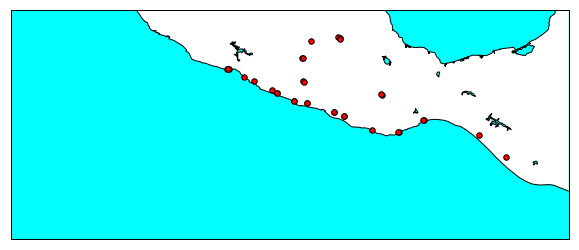

"\nfor i in range(len(df)):\n    plt.cla()\n    clat=df['Lat'][i]\n    clon=df['Lon'][i]\n    \n    fig.scatter(clat,clon,s=100)\n    plt.pause(0.1)\n"

In [17]:
#animation
fig=plt.figure(figsize=(10,10))
m = Basemap(projection='mill',llcrnrlon=-110,llcrnrlat=12,urcrnrlat=20,urcrnrlon=-90,resolution='i')#lat_0=45,lon_0=45,height=200,width=200)#llcrnrlon=45,llcrnrlat=45,urcrnrlat=46,urcrnrlon=46)

m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='white',lake_color='aqua')
plt.scatter(m(lon,lat)[0],m(lon,lat)[1],s=30,c='red',zorder=10,edgecolor='black')
plt.show()

'''
for i in range(len(df)):
    plt.cla()
    clat=df['Lat'][i]
    clon=df['Lon'][i]
    
    fig.scatter(clat,clon,s=100)
    plt.pause(0.1)
'''